<a href="https://colab.research.google.com/github/sourcecode369/TensorFlow-2.0/blob/master/tensorflow_2.0_docs/TensorFlow%20Core/Tutorials/Text/Text_Classification_with_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, print_function, division, unicode_literals
%tensorflow_version 2.x
import tensorflow_datasets as tfds
import tensorflow as tf

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
%matplotlib inline

def plot_graphs(hisotry, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string],'')
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_' + string])
  plt.show()

TensorFlow 2.x selected.


In [2]:
dataset, info = tfds.load('imdb_reviews/subwords8k',with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


In [3]:
encoder = info.features['text'].encoder
print('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [4]:
sample_string = 'Hello Tensorflow'

encoded_string = encoder.encode(sample_string)
print('Encoded string is {}'.format(encoded_string))

original_string = encoder.decode(encoded_string)
print('The original string: {}'.format(original_string))

Encoded string is [4025, 222, 6307, 2327, 2934]
The original string: Hello Tensorflow


In [0]:
assert original_string == sample_string

In [6]:
for index in encoded_string:
  print("{} ----> {}".format(index, encoder.decode([index])))

4025 ----> Hell
222 ----> o 
6307 ----> Ten
2327 ----> sor
2934 ----> flow


In [0]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [0]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))

test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [0]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
history = model.fit(train_dataset, 
                    epochs=1, 
                    validation_data = test_dataset, 
                    validation_steps = 30,
                    verbose=1)

391/391 [==============================] - 52s 134ms/step - loss: 0.5459 - accuracy: 0.7131 - val_loss: 0.5974 - val_accuracy: 0.6953


In [0]:
def pad_to_size(vec, size):
  zeros = [0] * (size - len(vec))
  vec.extend(zeros)
  return vec

In [0]:
def sample_predictions(sentence, pad):
  encoded_sample_pred_text = encoder.encode(sample_pred_text)
  if pad:
    encoded_sample_pred_text = pad_to_size(encoded_sample_pred_text, 64)
  encoded_sample_pred_text = tf.cast(encoded_sample_pred_text, tf.float32)
  predictions = model.predict(tf.expand_dims(encoded_sample_pred_text, 0))
  return (predictions)

In [14]:
sample_pred_text = ('The movie was cool. The animation and the graphics - were out of the worlx. I would recommend this movie to all')
predictions = sample_predictions(sample_pred_text, pad=False)
print(predictions)

[[0.48889494]]


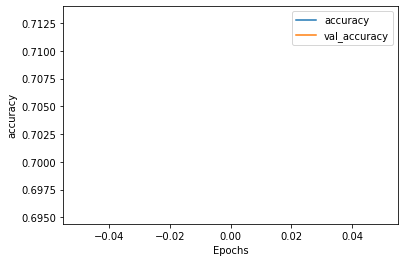

In [15]:
plot_graphs(history, 'accuracy')

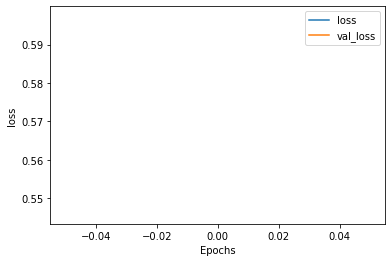

In [16]:
plot_graphs(history, 'loss')

### Stacking two or more LSTM layers

In [0]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(encoder.vocab_size, 64),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                             tf.keras.layers.Dense(128,activation='relu'),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')

])

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [19]:
history = model.fit(train_dataset, 
                    epochs=5,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/5
391/391 [==============================] - 146s 373ms/step - loss: 0.6213 - accuracy: 0.6306 - val_loss: 0.5714 - val_accuracy: 0.7083
Epoch 2/5
391/391 [==============================] - 144s 368ms/step - loss: 0.3807 - accuracy: 0.8385 - val_loss: 0.4167 - val_accuracy: 0.8177
Epoch 3/5
391/391 [==============================] - 146s 372ms/step - loss: 0.2765 - accuracy: 0.8920 - val_loss: 0.3338 - val_accuracy: 0.8708
Epoch 4/5
391/391 [==============================] - 144s 368ms/step - loss: 0.2344 - accuracy: 0.9128 - val_loss: 0.3600 - val_accuracy: 0.8521
Epoch 5/5
391/391 [==============================] - 145s 372ms/step - loss: 0.2020 - accuracy: 0.9258 - val_loss: 0.3546 - val_accuracy: 0.8562


In [20]:
test_loss, test_acc = model.evaluate(test_dataset)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

    391/Unknown - 58s 148ms/step - loss: 0.3612 - accuracy: 0.8543Test Loss: 0.3611976829407465
Test Accuracy: 0.8542799949645996


In [22]:
# predict on a sample text without padding
sample_pred_text = ('The movie was not good. The animation and the graphics were terrible. I would not recommend this movie.')
predictions = sample_predictions(sample_pred_text, pad=False)
print(predictions)

[[0.259832]]


In [23]:
# predict on a sample text with padding

sample_pred_text = ('The movie was not good. The animation and the graphics '
                    'were terrible. I would not recommend this movie.')
predictions = sample_predictions(sample_pred_text, pad=True)
print (predictions)

[[0.13019876]]


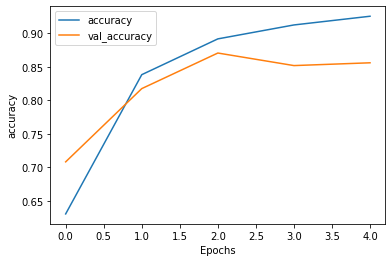

In [24]:
plot_graphs(history, 'accuracy')

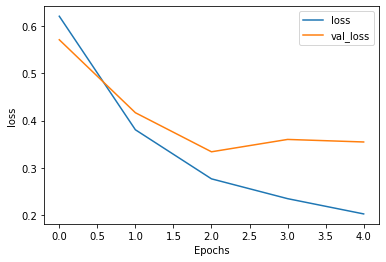

In [25]:
plot_graphs(history, 'loss')